In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from numpy import linalg as LA


In [2]:
ratings_all = np.loadtxt('data/data.txt')

## Baisc Visualization 1: All ratings in the MovieLens Dataset.

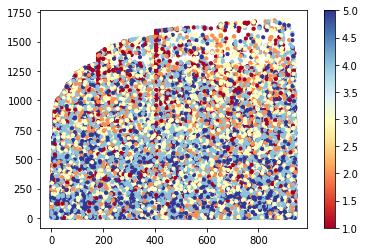

In [3]:
cm = plt.cm.get_cmap('RdYlBu')
plt.figure()
sc = plt.scatter(ratings_all[:,0], ratings_all[:,1], c=ratings_all[:,2], vmin=1, vmax=5, s=10, cmap=cm)
plt.colorbar(sc)

plt.show()

In [4]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx])
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [5]:
## find the ten most popular movies, and get their ratings
num_of_ratings_all = np.zeros(len(movies_all))
average_ratings_all = np.zeros(len(movies_all))
hist_ratings_all = np.zeros((len(movies_all), 6))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
    hist_ratings_all[int(rating[1])-1][int(rating[2])] += 1

average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)

index_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
index_best_10 = np.lexsort((num_of_ratings_all,average_ratings_all))[-10:][::-1]

most_popular_10 = []
best_10 = []

for idx in range(10):
    most_popular_10.append([index_most_popular_10[idx], movies_all[index_most_popular_10[idx]][1], num_of_ratings_all[index_most_popular_10[idx]], average_ratings_all[index_most_popular_10[idx]], hist_ratings_all[index_most_popular_10[idx]]])
    best_10.append([index_best_10[idx], movies_all[index_best_10[idx]][1], num_of_ratings_all[index_best_10[idx]], average_ratings_all[index_best_10[idx]], hist_ratings_all[index_best_10[idx]]])




## Basic visualization 2: All ratings of the ten most popular movies (movies which have received the most ratings) 

  ten most popular movies  name                             num of ratings    average ratings  hist of ratings
-------------------------  -----------------------------  ----------------  -----------------  -------------------------------
                       49  Star Wars (1977)                            583            4.35849  [  0.   9.  16.  57. 176. 325.]
                      257  Contact (1997)                              509            3.80354  [  0.  12.  43. 110. 212. 132.]
                       99  Fargo (1996)                                508            4.15551  [  0.  14.  18.  70. 179. 227.]
                      180  Return of the Jedi (1983)                   507            4.00789  [  0.   8.  23.  97. 208. 171.]
                      293  Liar Liar (1997)                            485            3.1567   [  0.  47.  73. 168. 151.  46.]
                      285  English Patient, The (1996)                 481            3.65696  [  0.  30.  53. 100. 167. 131.]


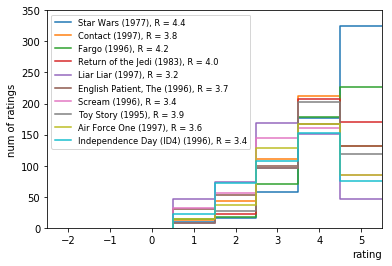

In [6]:
print(tabulate(most_popular_10, headers=['ten most popular movies',  'name', 'num of ratings', 'average ratings','hist of ratings']))


## draw all the ratings of the ten most popular movies
int_ratings = [0.5,1.5,2.5,3.5,4.5,5.5]

for idx in range(10):
    plt.step(int_ratings, most_popular_10[idx][4], label=most_popular_10[idx][1]+', R = %3.1f'%most_popular_10[idx][3])

plt.legend(fontsize='small',loc='upper left')

plt.xlim(-2.5, 5.5)
plt.ylim(0, 350)
plt.xlabel('rating',horizontalalignment='right', x=1.0)
plt.ylabel('num of ratings')

#plt.show()
plt.savefig('plots/'+'ratings_ten_most_popular_movies.pdf')
plt.savefig('plots/'+'ratings_ten_most_popular_movies.png')

## Basic visualization 3. All ratings of the ten best movies (movies with the highest average ratings).

  ten best movies  name                                                 num of ratings    average ratings  hist of ratings
-----------------  -------------------------------------------------  ----------------  -----------------  -------------------
             1292  Star Kid (1997)                                                   3                  5  [0. 0. 0. 0. 0. 3.]
             1188  Prefontaine (1997)                                                3                  5  [0. 0. 0. 0. 0. 3.]
             1499  Santa with Muscles (1996)                                         2                  5  [0. 0. 0. 0. 0. 2.]
             1466  Saint of Fort Washington, The (1993)                              2                  5  [0. 0. 0. 0. 0. 2.]
             1652  Entertaining Angels: The Dorothy Day Story (1996)                 1                  5  [0. 0. 0. 0. 0. 1.]
             1598  Someone Else's America (1995)                                     1                  5  [0. 0. 0

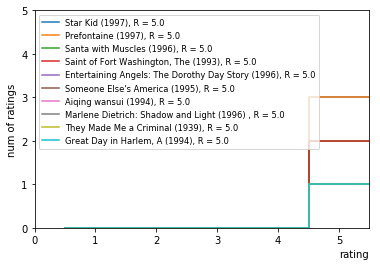

In [7]:
print(tabulate(best_10, headers=['ten best movies',  'name', 'num of ratings', 'average ratings','hist of ratings']))

## draw all the ratings of the ten best movies
int_ratings = [0.5,1.5,2.5,3.5,4.5,5.5]

for idx in range(10):
    plt.step(int_ratings, best_10[idx][4], label=best_10[idx][1]+', R = %3.1f'%best_10[idx][3])

plt.legend(fontsize='small',loc='upper left')

plt.xlim(0, 5.5)
plt.ylim(0, 5)
plt.xlabel('rating',horizontalalignment='right', x=1.0)
plt.ylabel('num of ratings')

#plt.show()
plt.savefig('plots/'+'ratings_ten_best_movies.pdf')
plt.savefig('plots/'+'ratings_ten_best_movies.png')

## Basic visualization 4. All ratings of movies from three genres of your choice (create three separate visualizations).

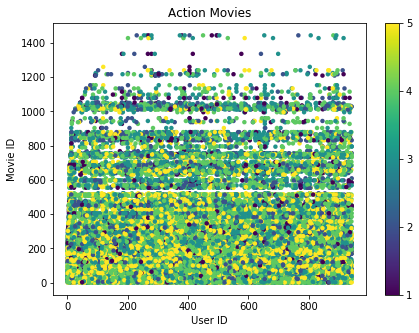

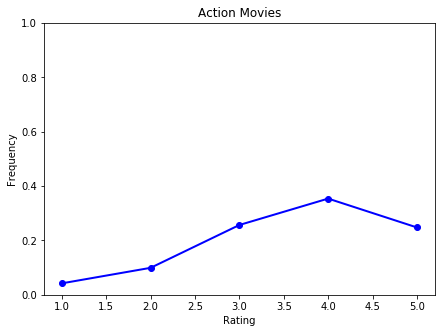

In [8]:
uid, mid, rating = np.loadtxt('data/data.txt', delimiter='\t', usecols = (0,1,2), unpack = True)

action, doc, drama = np.loadtxt('data/movies.txt', delimiter=';', usecols = (3,9,10), unpack = True)

midselection = []
for idx in range(len(action)):
    if action[idx] == 1:
        midselection.append(mid[idx])
        
uidlist = []
midlist = []
ratlist = []
for idx in range(len(uid)):
    if mid[idx] in midselection:
        uidlist.append(uid[idx])
        midlist.append(mid[idx])
        ratlist.append(rating[idx])

        
        
fig, ax = plt.subplots(1,figsize=(7,5))
cax = plt.scatter(uidlist, midlist, c=ratlist, edgecolor = 'none', s = 20)
cbar = fig.colorbar(cax, ticks = [1,2,3,4,5])
plt.title('Action Movies')
plt.ylabel('Movie ID')
plt.xlabel('User ID')
plt.savefig('plots/'+'Action.png')

freq = [0,0,0,0,0]
for idx in range(len(ratlist)):
    rat = int(ratlist[idx])
    freq[rat-1] += 1
    
freq = [x/len(ratlist) for x in freq]
fig, ax = plt.subplots(1,figsize=(7,5))
plt.plot([1,2,3,4,5],freq,'b-',linewidth=2)
plt.plot([1,2,3,4,5],freq,'bo')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim([0,1])
plt.title('Action Movies')
plt.savefig('plots/'+'Action_freq.png')
plt.show()

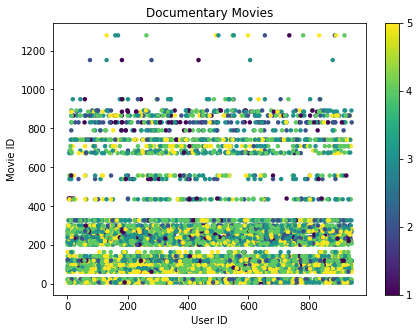

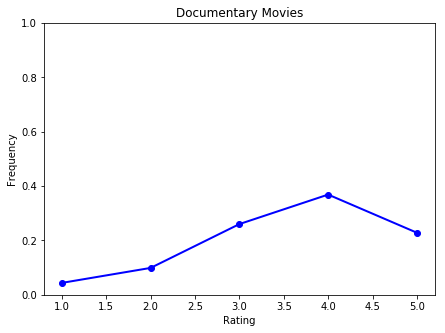

In [9]:
midselection = []
for idx in range(len(doc)):
    if doc[idx] == 1:
        midselection.append(mid[idx])
        
uidlist = []
midlist = []
ratlist = []
for idx in range(len(uid)):
    if mid[idx] in midselection:
        uidlist.append(uid[idx])
        midlist.append(mid[idx])
        ratlist.append(rating[idx])

fig, ax = plt.subplots(1,figsize=(7,5))
cax = plt.scatter(uidlist, midlist, c=ratlist, edgecolor = 'none', s = 20)
cbar = fig.colorbar(cax, ticks = [1,2,3,4,5])
plt.title('Documentary Movies')
plt.ylabel('Movie ID')
plt.xlabel('User ID')
plt.savefig('plots/'+'Doc.png')

freq = [0,0,0,0,0]
for idx in range(len(ratlist)):
    rat = int(ratlist[idx])
    freq[rat-1] += 1

freq = [x/len(ratlist) for x in freq]
fig, ax = plt.subplots(1,figsize=(7,5))
plt.plot([1,2,3,4,5],freq,'b-',linewidth=2)
plt.plot([1,2,3,4,5],freq,'bo')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim([0,1])
plt.title('Documentary Movies')
plt.savefig('plots/'+'Doc_Freq.png')
plt.show()

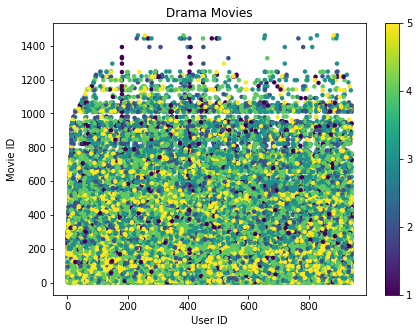

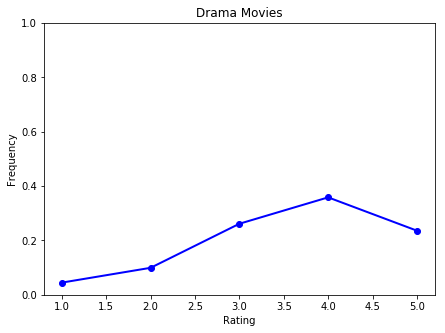

In [10]:
midselection = []
for idx in range(len(drama)):
    if drama[idx] == 1:
        midselection.append(mid[idx])
        
uidlist = []
midlist = []
ratlist = []

for idx in range(len(uid)):
    if mid[idx] in midselection:
        uidlist.append(uid[idx])
        midlist.append(mid[idx])
        ratlist.append(rating[idx])

fig, ax = plt.subplots(1,figsize=(7,5))
cax = plt.scatter(uidlist, midlist, c=ratlist, edgecolor = 'none', s = 20)
cbar = fig.colorbar(cax, ticks = [1,2,3,4,5])
plt.title('Drama Movies')
plt.ylabel('Movie ID')
plt.xlabel('User ID')
plt.savefig('plots/'+'Drama.png')


freq = [0,0,0,0,0]
for idx in range(len(ratlist)):
    rat = int(ratlist[idx])
    freq[rat-1] += 1

freq = [x/len(ratlist) for x in freq]
fig, ax = plt.subplots(1,figsize=(7,5))
plt.plot([1,2,3,4,5],freq,'b-',linewidth=2)
plt.plot([1,2,3,4,5],freq,'bo')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim([0,1])
plt.title('Drama Movies')
plt.savefig('plots/'+'Drama_Freq.png')
plt.show()